In [50]:
'''This block is to import all packages needed'''

# Data processing
import numpy as np
import cv2

# Python image library
from PIL import Image

# Image transformation
import scipy.ndimage as ndimage

# Linear regression, smoothing
from scipy.stats import linregress

# Plotting
%matplotlib widget
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import math as math

# Conversion
import rawpy
import imageio
from pathlib import Path
import glob
import skimage
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
import os

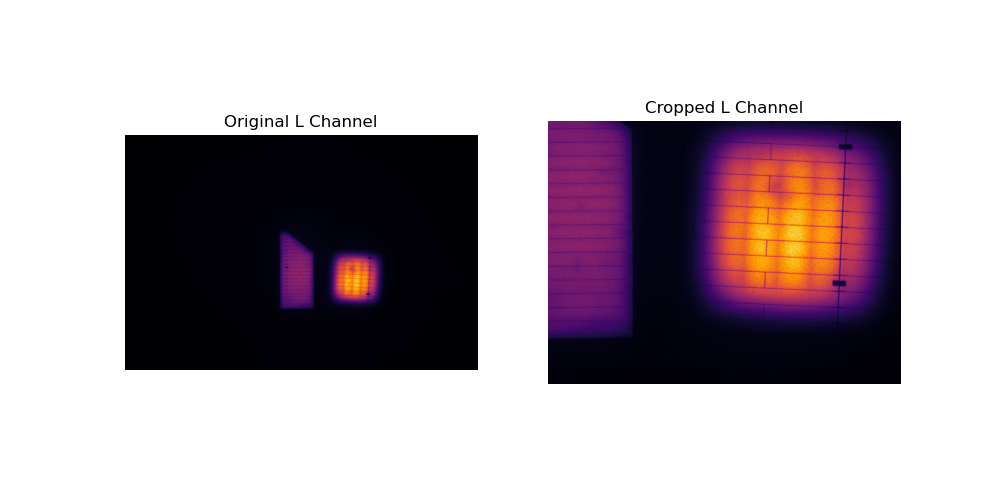

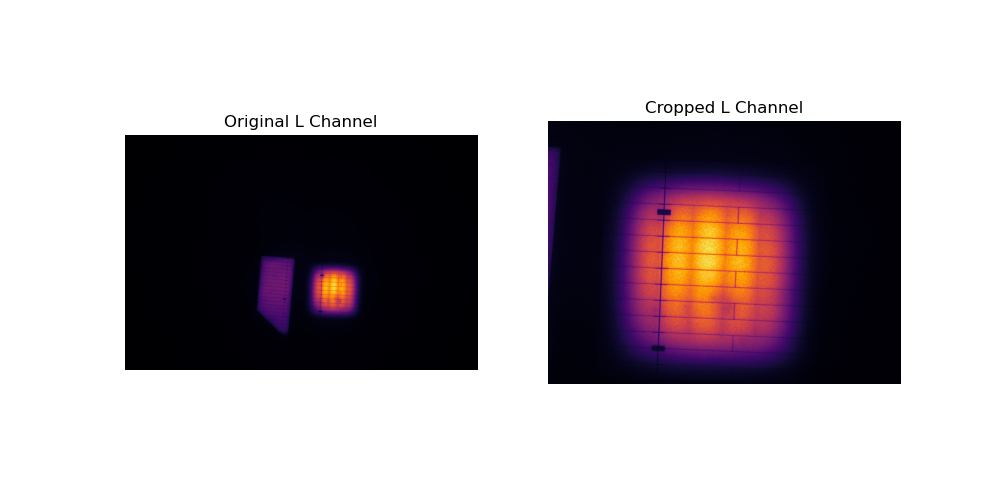

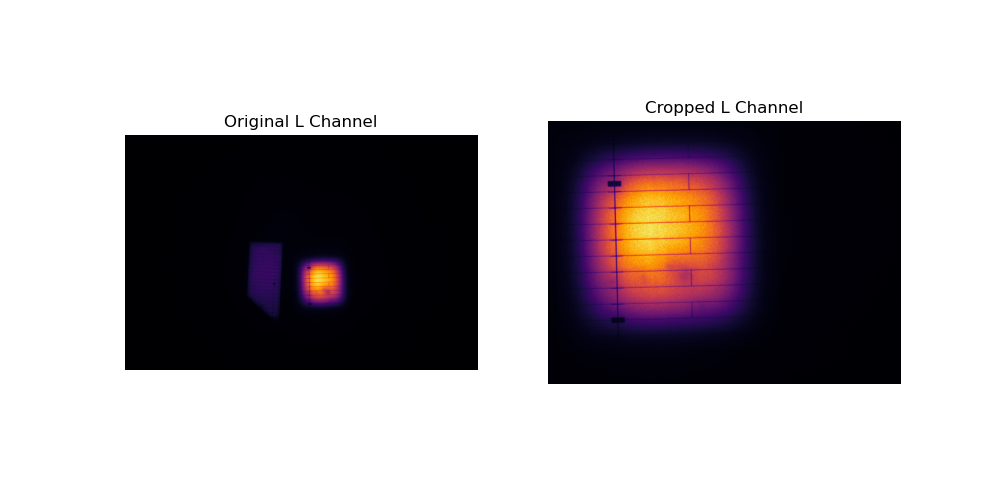

In [51]:
'''This block is to convert all .nef into .tiff files'''

# Input the path to your folder (remember the double back slash)
loc = 'C:\\Users\\oums1322\\OneDrive - Nexus365\\Work\\Group\\equipment\\PL\\YL'
os.chdir(loc)
mydir = Path(loc)

# Convert all .nef files to .tiff and extract the luminance channel (for explanation, please check Anastasia's User guide for PL)
for file in mydir.glob('*.nef'):
    # Directly use file path
    with rawpy.imread(str(file)) as raw:
        #rgb = raw.postprocess(gamma=(1, 1), no_auto_bright=True, output_bps=16)
        rgb = raw.postprocess(gamma=(1, 1), no_auto_bright=True, output_bps=16, half_size=True)
        lab = skimage.color.rgb2lab(rgb)
        l_channel, a_channel, b_channel = cv2.split(lab)
        #The output file will be saved in the same folder as 'OriginalFileName'+'_l'
        output_path = mydir.joinpath(file.stem + '_l' + '.tiff')
        im = Image.fromarray(l_channel)
        im.save(output_path)
        # If you want to save other channels or different formats, uncomment the following lines
        # imageio.imsave(file.stem + 'anastasia.tiff', l_channel)
        # imageio.imsave(output_path, l_channel)
        #TOP LEFT CORNER
        x0 = 1422
        y0 = 1000
        #BOTTOM RIGHT CORNER
        x1 = 2219
        y1 = 1594
        
        # Crop the image
        cropped_image = l_channel[y0:y1, x0:x1]
        
        # Save the cropped image
        output_path = mydir.joinpath(file.stem + '_cropped.tiff')
        im = Image.fromarray(cropped_image)
        im.save(output_path)
        
        # Plot the original L channel and the cropped region
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(l_channel, cmap='inferno')
        #plt.plot([x, x+w, x+w, x, x], [y, y, y+h, y+h, y], 'r')
        plt.title('Original L Channel')
        plt.axis('off')
        
        plt.subplot(1, 2, 2)
        plt.imshow(cropped_image, cmap='inferno')
        plt.title('Cropped L Channel')
        plt.axis('off')
        
        plt.show()

In [52]:
'''this block is to parse the .tiff file into python'''

# Initialise
data = {}
# Assign different files to different keys
data['AsRec'] = np.array(Image.open('DB2_as received_from rear_shutter speed 3_0001_cropped.tiff'), dtype = np.float64)
data['AfterOpening'] = np.array(Image.open('DB2_after opening_from rear_shutter speed 3_0001_cropped.tiff'), dtype = np.float64)
data['AfterITO'] = np.array(Image.open('DB2_after ITO deposition_from rear_shutter speed 3_0001_cropped.tiff'), dtype = np.float64)
# You can do mathematic operation to these images. For example, if the different images were taken with different exposure time
#data['b'] *=1.2
#data['c'] *=0.8

# Use the following to change the entire input
# for i in data.keys():
#     data[i] = (data[i] * 4.77965e-7 + 6.41446e-1)*1000

In [53]:
data.keys()

dict_keys(['AsRec', 'AfterOpening', 'AfterITO'])

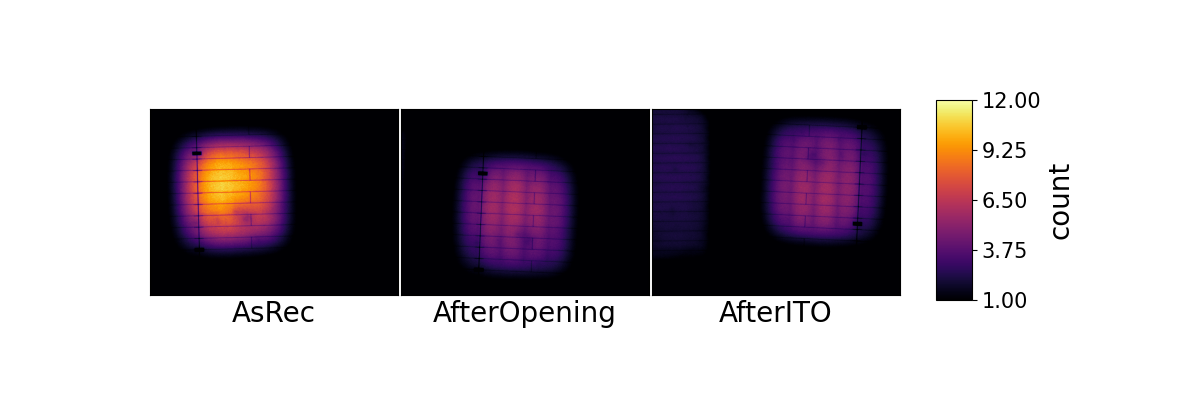

In [65]:
# Clear all previous figures to free memory (optional)
plt.close('all')

# Generate graph
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Image names
image_names = ['AsRec', 'AfterOpening', 'AfterITO']

# Choose a colour map
color_map = plt.get_cmap('inferno')

# Display each image on its respective subplot
for ax, image_name in zip(axs, image_names):
    image_data = data[image_name]  # Data is the dictionary containing image data
    color_norm = colors.Normalize(vmin=1, vmax=12)
    frame = ax.imshow(image_data, norm=color_norm, cmap=color_map)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(image_name, fontsize=20)

# Adjust spacings between images
fig.subplots_adjust(right=0.75, wspace=0.01, hspace=0.3)

# Add colourbar
ticks_on_colorbar = np.linspace(1, 12, 5) # (start, stop, num)
colorbar_ax = fig.add_axes([0.78, 0.25, 0.03, 0.5]) # Adjust the position and size of the color bar [left, bottom, width, height]
colorbar = fig.colorbar(frame, cax=colorbar_ax, ticks=ticks_on_colorbar)
colorbar.ax.tick_params(labelsize=15)
colorbar.set_label('count', rotation=90, fontsize=20)

# Show the images
plt.show()

# Save graph
# fig.savefig('proc.png')